
# Project: Tmdb movies Dataset Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Dans ce projet on étudiera les données des films provenant du site *TMDB : The Movie Database*. Ce dataset contient des données liées aux acteurs, réalisateurs, budget, revenu, date de réalisation...

Les questions dont on s'interessent sont les suivantes:
1. Est ce qu'il y a une relation entre la popularité et la moyenne des votes?
2. Est ce qu'il y'a des acteurs commun dans les films les plus populaires?
3. Est ce que la présence de ces acteurs permet d'augmenter la popularité du film?
4. Quels sont les genres de films qui ont eu le plus de popularité?
5. Quel est la société de production ayant produit les films les plus populaires?
6. Quels sont les mots clés qui se répètent dans les films les plus populaires?
7. Est ce que la tendance des genres des films populaires change selon les années?
8. Quel est le réalisateur ayant produit les films les plus populaires?


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('seaborn-darkgrid')


<a id='wrangling'></a>
## Data Wrangling

Dans cette partie on s'interessera à l'évaluation du dataset afin de détecter la présence des anomalies, et puis corriger les différents problèmes liés à ce dataset.


In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
# types and look for instances of missing or possibly errant data.
df = pd.read_csv('data/tmdb_movies_data.csv')
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [4]:
df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/1966,11,7.4,1966,0.0000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/1966,20,5.7,1966,0.0000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/1966,11,6.5,1966,0.0000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/1966,22,5.4,1966,0.0000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/1966,15,1.5,1966,127642.2792,0.0


In [5]:
df.shape

(10866, 21)

In [6]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

Concernant les types des colonnes ils semblent être dans le bon type sauf la colonne 'release_date' qui devrait être convertit en date.

In [7]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Il semble que les colonnes *budget*, *revenue*, et *runtime* ont une valeur min égale à zéro ce qui invite à plus d'investigations au niveau des lignes concerné par ces valeurs.

In [8]:
df.query('runtime == 0 | budget == 0')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/2015,425,6.4,2015,0.0,2.700677e+07
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/2015,474,6.2,2015,0.0,2.056620e+07
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,...,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/2015,81,5.5,2015,0.0,4.222338e+04
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/2015,27,5.1,2015,0.0,0.000000e+00
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/2015,569,7.7,2015,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10860,5060,tt0060214,0.087034,0,0,Carry On Screaming!,Kenneth Williams|Jim Dale|Harry H. Corbett|Joa...,NaN,Gerald Thomas,Carry On Screaming with the Hilarious CARRY ON...,...,The sinister Dr Watt has an evil scheme going....,87,Comedy,Peter Rogers Productions|Anglo-Amalgamated Fil...,5/20/1966,13,7.0,1966,0.0,0.000000e+00
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/1966,11,7.4,1966,0.0,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/1966,20,5.7,1966,0.0,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/1966,11,6.5,1966,0.0,0.000000e+00


Au niveau du budget, un film sans budget sera necessairement un film d'amateurs où il n'y a pas d'acteurs connus, alors que dans lignes qu'on obtient on a bien des réalisateurs et des acteurs connu.

Pour la valeur de *runtime* qui représente le nombre de minutes d'un film, il est impossible d'avoir la valeur zéro.

Pour le revenu là il est possible, voyons les films qui ont un revenue nul.

In [9]:
df.query('revenue_adj == 0')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
48,265208,tt2231253,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,NaN,Simon West,Never bet against a man with a killer hand.,...,When a Las Vegas bodyguard with lethal skills ...,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/2015,481,5.3,2015,2.759999e+07,0.0
67,334074,tt3247714,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,http://survivormovie.com/,James McTeigue,His Next Target is Now Hunting Him,...,A Foreign Service Officer in London tries to p...,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/2015,280,5.4,2015,1.839999e+07,0.0
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/2015,27,5.1,2015,0.000000e+00,0.0
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/2015,569,7.7,2015,0.000000e+00,0.0
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/2015,11,5.4,2015,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/1966,11,7.4,1966,0.000000e+00,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/1966,20,5.7,1966,0.000000e+00,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/1966,11,6.5,1966,0.000000e+00,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/1966,22,5.4,1966,0.000000e+00,0.0


D'après ces résultats on voit qu'il y a des films qui ont obtenu des revenus mais qui sont présent dans le dataset avec un revenu nul.
On conclut donc que la valeur zéro pour les colonnes *budget* , *runtime* ou *revenue* représente une valeure manquante, et qui ont été remplacé par des zéros.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [11]:
df.sample(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1504,17445,tt1384590,0.725654,3500000,0,Green Lantern: First Flight,Christopher Meloni|Victor Garber|Michael Madse...,http://www.warnervideo.com/greenlanterndvd/,Lauren Montgomery,Superman was born a hero. Batman became a hero...,...,Test pilot Hal Jordan finds himself recruited ...,75,Animation|Science Fiction|Action,DC Comics|Warner Bros. Animation,7/28/2009,51,6.2,2009,3.557402e+06,0.000000e+00
10523,1857,tt0092106,0.438751,0,5706456,The Transformers: The Movie,Judd Nelson|Peter Cullen|Frank Welker|Leonard ...,NaN,Nelson Shin,Beyond good. Beyond evil. Beyond your wildest ...,...,The Autobots must stop a colossal planet-consu...,84,Animation,De Laurentiis Entertainment Group (DEG)|Marvel...,8/8/1986,70,7.2,1986,0.000000e+00,1.135246e+07
4623,94380,tt1928330,0.385121,0,0,Bad Ass,Danny Trejo|Charles S. Dutton|Ron Perlman|Joyf...,http://www.heisbadass.com/,Craig Moss,They messed with the wrong senior citizen.,...,Decorated Vietnam hero Frank Vega returns home...,90,Action|Drama,Amber Lamps,4/12/2012,87,5.4,2012,0.000000e+00,0.000000e+00
9991,10166,tt0100944,1.125794,0,0,The Witches,Anjelica Huston|Mai Zetterling|Jasen Fisher|Ja...,NaN,Nicolas Roeg,Saving the world from witches is a tall order ...,...,A young boy named Luke and his grandmother go ...,91,Adventure|Fantasy|Horror,Lorimar Film Entertainment|Jim Henson Productions,2/16/1990,88,6.6,1990,0.000000e+00,0.000000e+00
5032,12090,tt0305711,0.648946,18000000,101564935,Just Married,Ashton Kutcher|Brittany Murphy|Christian Kane|...,NaN,Shawn Levy,Welcome to the honeymoon from hell.,...,Tom Leezak and Sarah McNerney fall in love and...,95,Comedy,Twentieth Century Fox Film Corporation|Robert ...,1/9/2003,242,5.3,2003,2.133635e+07,1.203903e+08


In [12]:
# pourcentage de remplissage
1 - (df.isnull().sum() / df.shape[0])

id                      1.000000
imdb_id                 0.999080
popularity              1.000000
budget                  1.000000
revenue                 1.000000
original_title          1.000000
cast                    0.993006
homepage                0.270201
director                0.995951
tagline                 0.740107
keywords                0.862599
overview                0.999632
runtime                 1.000000
genres                  0.997883
production_companies    0.905209
release_date            1.000000
vote_count              1.000000
vote_average            1.000000
release_year            1.000000
budget_adj              1.000000
revenue_adj             1.000000
dtype: float64

D'après le résultat précedent, on voit que quelques colonnes ont des valeurs manquantes, mais la plupart ont un taux de remplissage supérieur à 90%.

In [13]:
df['keywords']

0        monster|dna|tyrannosaurus rex|velociraptor|island
1         future|chase|post-apocalyptic|dystopia|australia
2        based on novel|revolution|dystopia|sequel|dyst...
3                    android|spaceship|jedi|space opera|3d
4                      car race|speed|revenge|suspense|car
                               ...                        
10861                             surfer|surfboard|surfing
10862                            car race|racing|formula 1
10863                             car|trolley|stealing car
10864                                                spoof
10865                  fire|gun|drive|sacrifice|flashlight
Name: keywords, Length: 10866, dtype: object

In [14]:
df.duplicated().sum()

1

Dans ce dataset on n'a qu'une seule valeur dupliqué.

Maintenant qu'on a terminé avec l'évaluation des données on peut commencer la partie nettoyage.

Commençons d'abord par traiter les valeurs manquantes:

In [15]:
# Delete columns with less than 80% in filling rate
# otherwise drop the rows with null values since they're all strings
df_movies = df.copy()
df_movies.drop(labels=['homepage', 'tagline'], axis = 1, inplace = True)
df_movies.dropna(inplace=True)

In [16]:
df_movies.isnull().sum().any()

False

In [17]:
df_movies.shape

(8665, 19)

Dans cette étape on convertira la colonne *release_date* en type date:

In [18]:
# convertir la colonne 'release_date' en type date
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'])
df_movies['release_date'].dtype

dtype('<M8[ns]')

Et on termine par supprimer les valeurs dupliqués:

In [19]:
df_movies.drop_duplicates(inplace=True)
df_movies.duplicated().sum()

0

<a id='eda'></a>
## Exploratory Data Analysis


### Question 1 : Est ce qu'il y a une relation entre la popularité et la moyenne des votes?

<AxesSubplot:>

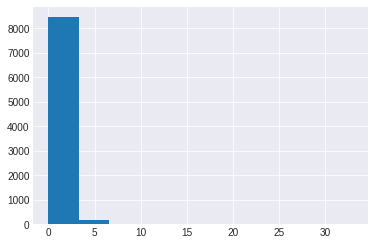

In [20]:
df_movies.popularity.hist()

<AxesSubplot:>

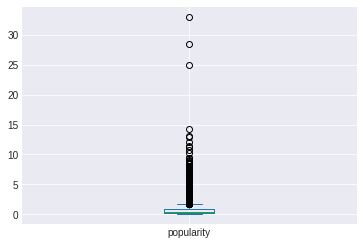

In [21]:
df_movies.popularity.plot.box()

Il semble qu'on a beaucoup d'outliers dans la variable *popularity*

<AxesSubplot:>

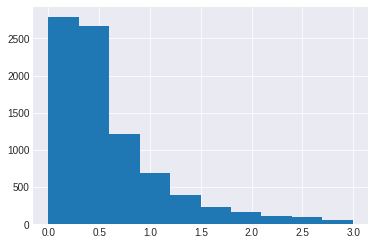

In [22]:
df_movies.query('popularity < 3').popularity.hist()

On voit donc bien que la plupart des films de ce dataset ont une popularité très faible.

Passons maintenant à la variable *vote_average*:

<AxesSubplot:>

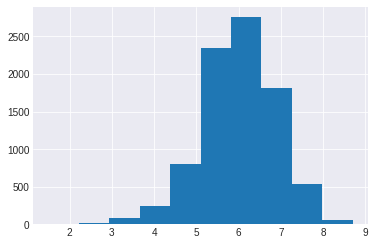

In [23]:
df_movies.vote_average.hist()

la plupart des films ont reçu un vote assez élevé entre 5 et 7.

<AxesSubplot:xlabel='vote_average', ylabel='popularity'>

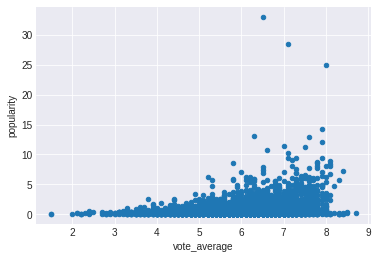

In [24]:
df_movies.plot.scatter(x = 'vote_average', y = 'popularity')

In [25]:
df_movies.vote_average.corr(df_movies.popularity)

0.2449651587361198

Il semble d'après les résultat qu'il n'existe pas de relation entre la moyenne des votes et la popularité, ce qui est un peu bizarre puisqu'un film populaire devrait être bien noté. 

D'après la documentation de l'api du site "Tmdb" à partir duquel les données ont été extraite on indique que la valeur de popularité est calculé chaque jour à partir des métriques suivantes:
* Number of votes for the day
* Number of views for the day
* Number of users who marked it as a "favourite" for the day
* Number of users who added it to their "watchlist" for the day
* Release date
* Number of total votes
* Previous days score

Donc, apparement on ne prend pas la moyenne des votes mais plutot le nombre des votes du jour et on le combine avec d'autres métriques, ce qui donne une valeur qui peut être differente d'un jour à l'autre.

### Question 2: Est ce qu'il y'a des acteurs commun dans les films les plus populaires?

Pour repondre à cette question il faut d'abord séparer les données en deux catégories : les films les plus populaires et les films les moins populaires.


Essayons d'abord d'isoler les films les plus populaires. Pour ce cas on prendra les données qui sont supérieures à la medianne.

In [26]:
most_popular_sep = df_movies.popularity.median()
most_popular_sep

0.449377

In [27]:
df_popular_movies = df_movies.loc[df_movies.popularity >= most_popular_sep]
df_popular_movies.shape

(4332, 19)

Essayons maintenant d'étudier les acteurs de ces films.

In [28]:
def parse_list_with_sep(list, sep):
    '''
        Parcourir chaque ligne en isolant les différents items et
        les ajoutant à une liste s'il ne sont pas deja present.
    '''
    list_elem = [elem for row in list for elem in row.split(sep) ]
    return list_elem


actors = pd.Series(parse_list_with_sep(df_popular_movies.cast, '|'))
actors_num_mv = actors.value_counts()
print('Nombre des acteurs qui ont apparu dans plus qu\'un film populaire :')
actors_num_mv[actors_num_mv > 1].shape

Nombre des acteurs qui ont apparu dans plus qu'un film populaire :


(3007,)

Donc effectivement il y a des acteurs communs entre les films les plus populaires.

### Question 3: Est ce que la présence de ces acteurs permet d'augmenter la popularité du film?

In [29]:
actors_num_mv[:15]

Robert De Niro           57
Bruce Willis             49
Nicolas Cage             46
Samuel L. Jackson        46
Johnny Depp              38
Tom Hanks                37
Brad Pitt                35
Sylvester Stallone       35
Morgan Freeman           35
Arnold Schwarzenegger    33
Nicole Kidman            33
Mark Wahlberg            33
Ewan McGregor            33
Matt Damon               33
Liam Neeson              32
dtype: int64

La liste precedente donne les 15 top acteurs qui ont participé le plus dans les films les plus populaires.

Examinons maintenant la distribution de la popularité des films de quelque uns de ces acteurs.

Number of movies for Robert De Niro : 68
Number of movies for Tom Cruise : 37
Number of movies for Johnny Depp : 43


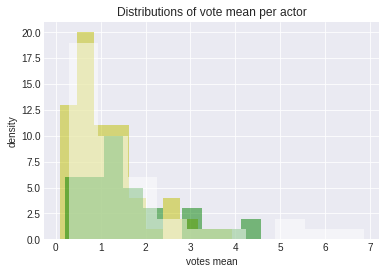

In [30]:
def plot_hist_column_per_actor(column_name, actor_name, color = 'b'):
    actor_mv = df_movies.loc[df_movies.cast.str.contains(actor_name)]
    print(f'Number of movies for {actor_name} : {actor_mv.shape[0]}')
    plt.hist(actor_mv[column_name], color = color, alpha = 0.5)
    plt.xlabel('votes mean')
    plt.ylabel('density')
    plt.title('Distributions of vote mean per actor')

column_name = 'popularity'
plot_hist_column_per_actor(column_name,'Robert De Niro', 'y')
plot_hist_column_per_actor(column_name,'Tom Cruise', 'g')
plot_hist_column_per_actor(column_name,'Johnny Depp', 'w')

D'après le graphique ci dessus il semble que la majorité des films de ces acteurs ont une popularité supérieurs à la medianne qui est égale à 0.44 donc peuvent être consideré comme des films populaires. Ce dataset ne represente qu'un échantillon de la totalité des films où apparaissent ces acteurs donc pour être sûr que c'est le même comportement au niveau de la population entière il faudra utiliser des tests statistiques. On ne peut aussi conclure que seul la présence d'un acteur dans un film peut impacté la popularité parcqu'il se peut que ces acteurs apparaissent plus dans les genres qui ont une grande popularité par exemple.

Alors, on peut faire un test t pour tester la moyenne de popularité des films de Johnny Depp par exemple et puis on vérifie les genres associé à ses films:

Ce qu'on aimerait savoir d'abord est :
1. quel est la valeur de popularité sur laquelle on peut se baser pour juger qu' un film est populaire
2. après on aimerait savoir si la distribution des films de Johnny Depp à une moyenne supérieur à la valeur à partir de laquelle on juge qu'un film est populaire.

Cette vérification avec un test d'hypothèse est necessaire puisqu'on n a pas accès à la totalité des films de Johnny Depp pour calculer directement la moyenne et la comparer, donc si l'echantillon qu'on a ne favorise pas notre hypthèse on la rejette.


Pour le premier point, on prendra la medianne des films populaires de notre echantillon qui est donc le début du dernier quartile des valeur de popularité:

In [31]:
mean_popular_mv = df.popularity.quantile(0.75)
mean_popular_mv

0.7138169999999999

Notre hypothèse nulle sera donc : 
$$H_0 = la\,moyenne\,de\,popularité\,des\,films\,de\,Johnny\,Depp\,est\,>=\,0.71$$

On prend α = 0.05

Donc on a ici un tet T de type one tail/one sample.

Assumptions :
* Data needs to be numerical/continuous. Otherwise, the mean can’t even be calculated.
* The data are independent. Namely, the action of one sample/subject will not affect the other.
* No extreme values. Since mean takes all the data points into account, it will be seriously affected by outliers and the testing result might be biased.
* The data is normally distributed. This assumption is not that strict, but the data should not deviate too much from the normal distribution. The assumption is intuitive since it’s only when the data is symmetric that the mean is an unbiased representation of the center of data.

In [32]:
depp_movies = df_movies.loc[df_movies.cast.str.contains('Johnny Depp')]
depp_movies.shape

(43, 19)

<AxesSubplot:>

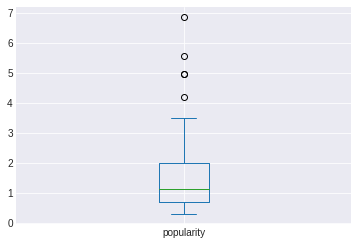

In [33]:
depp_movies.popularity.plot.box()

Pour la troisième hypothese de la présence des valeurs aberantes, il va falloir les supprimer avant d'appliquer le test.

In [34]:
def remove_outlier(column):
    Q1 , Q3 = column.quantile(0.25), column.quantile(0.75)
    IQ = Q3 - Q1
    max = Q3 + (1.5*IQ)
    min = Q1 - (1.5*IQ)
    print(f'outliers : {column[(column > max) | (column < min)]}')
    return column[(column <= max) & (column >=min)]

depp_movies_pop = remove_outlier(depp_movies.popularity)
depp_movies_pop.shape

outliers : 1921    5.572950
3375    4.955130
4951    6.864067
6555    4.205992
7387    4.965391
Name: popularity, dtype: float64


(38,)

Puisque la taille de notre echantillon est > 30 on peut considerer que le theorème de la limite centrale peut être appliqué et que la distribution de la moyenne de popularité suivera la distribution de student puisque la variance de la population est inconnue.

In [35]:
from scipy import stats as st

st.ttest_1samp(depp_movies_pop, popmean=0.71, alternative='less')

Ttest_1sampResult(statistic=3.8912811800694986, pvalue=0.9997995019905364)

On obtient une valeur p supérieur à 0.05 ce qui indique que les résultats de notre echantillon sont cohérente avec l'hypothèse nulle, donc on ne peut pas la rejeter. On peut dire donc en général que les films de Johonny Depp sont des films populaires.

### Question 4: Quels sont les genres de films les plus populaires?

Nombre de genres des films populaires : 20


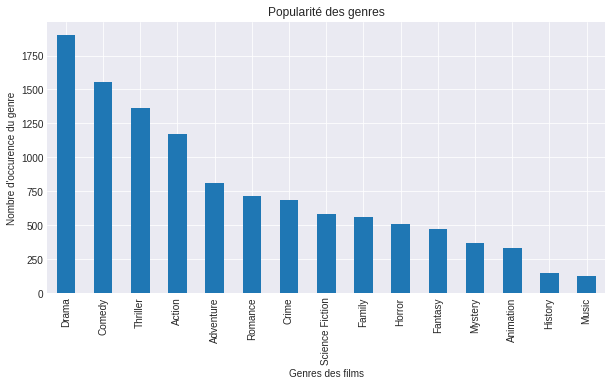

In [45]:
genres_bst_pop = pd.Series(parse_list_with_sep(df_popular_movies.genres, '|'))
print(f'Nombre de genres des films populaires : {genres_bst_pop.nunique()}')
ax = genres_bst_pop.value_counts()[:15].plot.bar(title = 'Popularité des genres', figsize=(10,5))
ax.set_xlabel("Genres des films")
ax.set_ylabel("Nombre d'occurence du genre");

Il apparait que les genres (Drama, Comedy et Thriller) sont les plus populaires.

Verifions les genres des films de Johnny Depp : 

<AxesSubplot:>

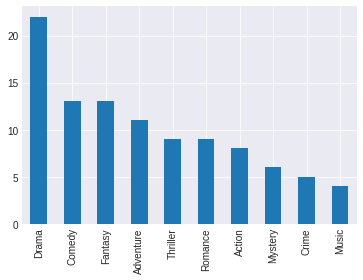

In [46]:
genres_depp = pd.Series(parse_list_with_sep(depp_movies.genres, '|'))
genres_depp.value_counts()[:10].plot.bar()

On constate que effectivement la popularité des films de Johnny Depp est aussi lié au genre du film puisque la plupart des films où il est apparu sont des films ayant des genres populaires.

### Question 5: Quel est la société de production ayant les films les plus populaires?

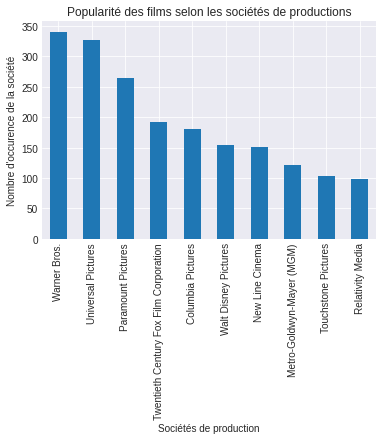

In [78]:
prod_companies = pd.Series(parse_list_with_sep(df_popular_movies.production_companies, '|'))
ax = prod_companies.value_counts()[:10].plot.bar(title = 'Popularité des films selon les sociétés de productions')
ax.set_xlabel("Sociétés de production")
ax.set_ylabel("Nombre d'occurence de la société");

Les sociétés de productions ayant les films les plus populaires sont : 
1. Warner Bros.
2. Universal Pictures
3. Paramount Pictures
4. Twentieth Century Fox Film Corporation
5. Columbia Pictures

### Question 6: Quels sont les mots clés qui se répètent dans les films les plus pouplaires?

In [48]:
key_words = pd.Series(parse_list_with_sep(df_popular_movies.keywords, '|'))
key_words.value_counts()[:15]

based on novel          167
sex                     119
dystopia                106
duringcreditsstinger    103
woman director           99
new york                 94
prison                   86
sport                    75
musical                  75
london                   74
murder                   70
biography                67
sequel                   67
independent film         67
high school              63
dtype: int64

D'après le résultat ci-dessus il semble que les films suivant sont les plus populaires:
1. Films se basant sur un roman
2. Films où il y a du sexe
3. Films se basant sur une dystopie.

### Question 7: Est ce que la tendance des genres des films populaires a changé avec les années?

Commençons par étudier les genres populaires par année :

In [49]:
df_popular_movies.release_year.min() , df_popular_movies.release_year.max()

(1960, 2015)

In [50]:
df_popular_movies.release_year.nunique()

56

In [51]:
genres_bst_pop.nunique()

20

In [52]:
# TODO : partager les années en 15 groupes et étudier le genre le plus dominant pour chaque groupe
# commmençons par voir le genre dominant pour chaque année
df_popular_movies_by_year = df_popular_movies[['release_year', 'genres']].copy()
df_popular_movies_by_year['genres'] = df_popular_movies.groupby(['release_year'], as_index=True)['genres'].transform(lambda x: '|'.join(x))
df_popular_movies_by_year = df_popular_movies_by_year.drop_duplicates(subset=['release_year', 'genres'])
df_popular_movies_by_year.head()

,release_year,genres
0,2015,Action|Adventure|Science Fiction|Thriller|Acti...
629,2014,Adventure|Drama|Science Fiction|Action|Science...
1329,1977,Adventure|Action|Science Fiction|Adventure|Act...
1386,2009,Action|Adventure|Fantasy|Science Fiction|Drama...
1919,2010,Action|Thriller|Science Fiction|Mystery|Advent...


In [53]:
df_popular_movies_by_year.set_index('release_year', inplace=True)
df_popular_movies_by_year.head()

,genres
release_year,
2015,Action|Adventure|Science Fiction|Thriller|Acti...
2014,Adventure|Drama|Science Fiction|Action|Science...
1977,Adventure|Action|Science Fiction|Adventure|Act...
2009,Action|Adventure|Fantasy|Science Fiction|Drama...
2010,Action|Thriller|Science Fiction|Mystery|Advent...


In [61]:
def get_top_genre(genres):
    genres = pd.Series(genres.split('|')).value_counts()
    max = genres.max()
    top_genre = genres[genres == max]
    return (top_genre.index.values[0], top_genre.values[0])

get_top_genre(df_popular_movies_by_year.genres[1966])

('Drama', 4)

In [62]:
df_popular_movies_by_year['top_genre'] = df_popular_movies_by_year.genres.apply(get_top_genre)
df_popular_movies_by_year['genre_count'] = df_popular_movies_by_year.top_genre.apply(lambda x : x[1])
df_popular_movies_by_year['top_genre'] = df_popular_movies_by_year.top_genre.apply(lambda x : x[0])
df_popular_movies_by_year.head()

,genres,top_genre,genre_count
release_year,,,
2015,Action|Adventure|Science Fiction|Thriller|Acti...,Drama,110
2014,Adventure|Drama|Science Fiction|Action|Science...,Drama,129
1977,Adventure|Action|Science Fiction|Adventure|Act...,Action,8
2009,Action|Adventure|Fantasy|Science Fiction|Drama...,Drama,93
2010,Action|Thriller|Science Fiction|Mystery|Advent...,Drama,95


In [59]:
# split the years into 10 groups
years_grps = np.array_split(df_popular_movies_by_year.index.sort_values().values, 10)
years_grps

[array([1960, 1961, 1962, 1963, 1964, 1965]),
 array([1966, 1967, 1968, 1969, 1970, 1971]),
 array([1972, 1973, 1974, 1975, 1976, 1977]),
 array([1978, 1979, 1980, 1981, 1982, 1983]),
 array([1984, 1985, 1986, 1987, 1988, 1989]),
 array([1990, 1991, 1992, 1993, 1994, 1995]),
 array([1996, 1997, 1998, 1999, 2000]),
 array([2001, 2002, 2003, 2004, 2005]),
 array([2006, 2007, 2008, 2009, 2010]),
 array([2011, 2012, 2013, 2014, 2015])]

In [63]:

def get_top_genre_by_yr_grp():
    '''
        Iterate over years groups and for each group
        get genre with max popularity by summing over
        the occurences.
    '''
    dict = {}
    for i ,yr_grp in enumerate(years_grps):
        top_genre_count = df_popular_movies_by_year.loc[yr_grp].groupby('top_genre')['genre_count'].sum()
        max_val = top_genre_count.max()
        max_genre = top_genre_count[top_genre_count == max_val]
        dict[i] = (max_genre.index.values[0], max_genre.values[0])
    return dict

top_genre_by_yr_grp = get_top_genre_by_yr_grp()

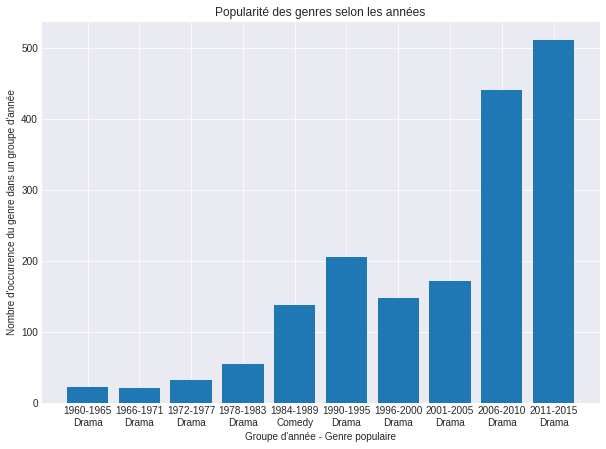

In [81]:
heights = [x[1] for x in top_genre_by_yr_grp.values()]
labels_years = ['{}-{}'.format(yr_grp[0],yr_grp[len(yr_grp)-1]) for yr_grp in years_grps]
labels_genres = [x[0] for x in top_genre_by_yr_grp.values()]
labels = ['{}\n{}'.format(lbl_yr,labels_genres[i]) for i,lbl_yr in enumerate(labels_years)]


plt.figure(figsize=(10, 7))
indx = np.arange(len(years_grps))
plt.bar(indx , height=heights)
plt.xticks(indx, labels)
plt.title("Popularité des genres selon les années")
plt.xlabel("Groupe d'année - Genre populaire")
plt.ylabel("Nombre d'occurrence du genre dans un groupe d'année");

D'après le graphique ci dessus il apparait que le genre 'Drama' a connu de plus en plus de popularité avec l'évolution des années.

### Question 8: Quel est le réalisateur ayant produit les films les plus populaires?

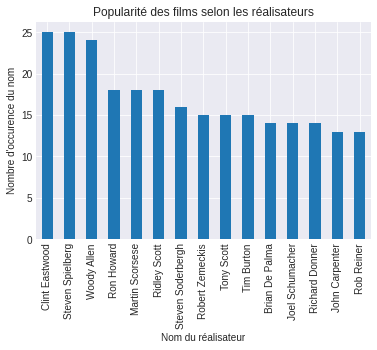

In [83]:
ax = df_popular_movies.director.value_counts()[:15].plot.bar(title = 'Popularité des films selon les réalisateurs')
ax.set_xlabel("Nom du réalisateur")
ax.set_ylabel("Nombre d'occurence du nom");

D'après le résultat ci dessus on voit que les réalisateurs ayant produit le plus de films populaires sont : 
1. Steven Spielberg
2. Clint Eastwood
3. Woody Allen

<a id='conclusions'></a>
## Conclusions
Pour conclure, le but de ce projet est de réaliser une analyse exploratoire des données provenant du dataset des films de TMDB afin de sortir avec des réponses pour les questions dont on s'intéresse, voici donc les résultats trouvé :

- Est ce qu'il y a une relation entre la popularité et la moyenne des votes?
Non la correlation entre les deux variables est très faible.
- Est ce qu'il y'a des acteurs commun dans les films les plus populaires?
Oui
- Est ce que la présence de ces acteurs permet d'augmenter la popularité du film?
Pour confirmer la réponse à cette question il faudra utiliser un test statistique.
- Quels sont les genres de films qui ont eu le plus de popularité?
Drama - Comedy - Thriller
- Quel est la société de production ayant produit les films les plus populaires?
 Warner Bros. - Universal Pictures - Paramount Pictures
-  Quels sont les mots clés qui se répètent dans les films les plus populaires?
Based on novel - sex - dystopia
- Est ce que la tendance des genres populaires change selon les années?
La popularité des films ayant le genre Drama a connu une croissance assez importante sur les dernières années, et qui reste toujours le genre le plus populaire depuis 1960.
- Quel est le réalisateur ayant produit les films les plus populaires?
Steven Spielberg

Il est aussi nécessaire de tirer l'attention sur le fait que ce dataset contient un grand nombre de données manquantes au niveau de quelques colonnes comme le budget et le revenu qui se trouvent avoir la valeur zéro au lieu d'une valeur manquante, en plus du fait que ces deux colonnes n'ont pas d'unité monétaire, et on n'a aucune information sur la date où ces données ont été recupéré ou si elles sont à jour, ce qui peu rendre les résultats de cette analyse obsolète.